In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import normalize
from msslib.utils import *
from msslib.data import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import functools as f
import random

In [3]:
unwanted_recto = ["VA223RN","VA327RN","VA001RN","VA002RN","VA006RN","VA007RN","VA008RN","VA009RN"]

def get_set_paths(directory):
    return sorted(list(filter(lambda x: "RN" in x and not any(s in x for s in unwanted_recto) , listpaths(directory))))


In [4]:
def scatter_4_dims(v, cols, colours):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    #ax1.axis([-1,-1,1,1])
    ax1.scatter(v[0], v[1],c=cols, alpha=0.5)
    ax1.set_ylabel("Element 1")
    #ax2.axis([-1,-1,1,1])
    ax2.scatter(v[3], v[1],c=cols, alpha=0.5)
    #ax3.axis([-1,-1,1,1])
    ax3.set_ylabel("Element 2")
    ax3.set_xlabel("Element 3")
    ax3.scatter(v[0], v[2],c=cols, alpha=0.5)
    #ax4.axis([-1,-1,1,1])
    ax4.set_xlabel("Element 4")
    ax4.scatter(v[3], v[2],c=cols, alpha=0.5)
    f.tight_layout()
    f.legend([mpatches.Patch(color=c, label=l) for c,l in zip(colours, mss_labels)], 
             mss_labels, loc=9, bbox_to_anchor=(0.6, 0.6))
    return f

In [5]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/"
data_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/"

label_paths = get_set_paths(label_dir)
data_paths = get_set_paths(data_dir)

path_pairs = list(zip(label_paths, data_paths))
print(len(path_pairs))

150


In [26]:
# I'm training LDA on this as well as the random test set to ensure I always get the same number of classes
lda_data_path = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/VA013RN-0014.npy"
lda_label_path = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/VA013RN-0014.npy"
lda_X = flatten_vector_matrix(np.load(lda_data_path))
lda_y = np.squeeze(flatten_vector_matrix(np.load(lda_label_path)))

In [28]:
split_at = 20
random.shuffle(path_pairs)
train = path_pairs[:split_at]

lda = LinearDiscriminantAnalysis(n_components=4)
for l, d in train:
    np.append(lda_X, flatten_vector_matrix(np.load(d)))
    np.append(lda_y, np.squeeze(flatten_vector_matrix(np.load(l))))

lda.fit(lda_X, lda_y)

/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=4, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [80]:
for i, ps in enumerate(path_pairs):
    if '239' in ps[0]:
        print(i)
        print(ps)

50
('/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/VA238RN-0239.npy', '/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/VA238RN-0239.npy')
80
('/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/VA239RN-0410.npy', '/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/VA239RN-0410.npy')


In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [81]:
y_path, X_path = path_pairs[80]
data = flatten_vector_matrix(np.load(X_path))
labels = flatten_vector_matrix(np.load(y_path))

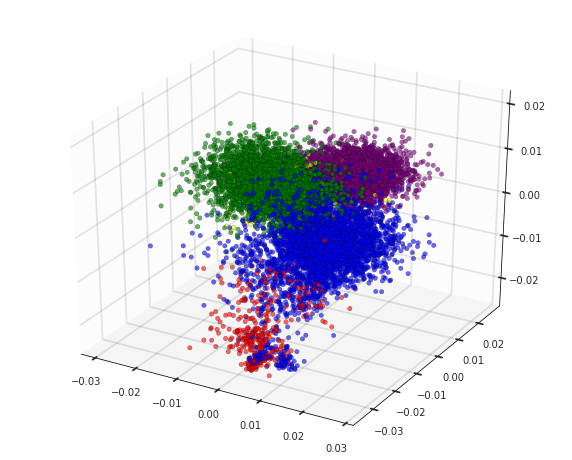

In [178]:
l_d = lda.transform(data)

l_rot = np.rot90(l_d)
l_norm = normalize(l_rot)
colours = ["red",'blue','green','yellow','purple']
cols = [colours[int(i)] for i in labels]


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.set_zticklabels([])
ax.set_xlim()

ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 0.1)}})
ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 0.1)}})
ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 0.1)}})

ax.w_xaxis.set_pane_color((0, 0, 0, 0.01))
ax.w_yaxis.set_pane_color((0, 0, 0, 0.01))
ax.w_zaxis.set_pane_color((0, 0, 0, 0.04))

ax.set_axis_bgcolor((0,0,0,0))
xs = l_norm[2]
ys = l_norm[0]
zs = l_norm[3]

ax.set_xlim(np.min(xs), np.max(xs))
ax.set_ylim(np.min(ys), np.max(ys))
ax.set_zlim(np.min(zs), np.max(zs))


ax.scatter(xs, ys, zs, c=cols, alpha=0.6)

plt.show()

In [179]:
fig.savefig('/home/finlay/Dropbox/struct_pred_poster/scatter.png',dpi=100, transparent=True)

In [97]:
np.save('./lda_scatter_labels.npy', lda_y)
np.save('./lda_scatter_LDA_reduce.npy', lda_X)

np.save('./individual_labels.npy', labels)
np.save('./individual_scatter.npy', data)

In [46]:
wit = np.load('./lda_scatter_LDA_reduce.npy')

In [50]:
wit[0][0]

5.0138456048492971e-06

In [ ]:
def sample_N(arr, n=10):
    if arr.shape[0] <= n:
        return arr
    else:
        return arr[np.random.choice(arr.shape[0], n)]
    
def 

In [62]:
colours[1]

'blue'